In [16]:
!pip install seaborn

In [44]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [45]:
def load_dataset():
    data = pd.read_csv("data/googleplaystore.csv")
    return data

In [46]:
dataset = load_dataset()
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [47]:
def print_summarize_dataset(dataset):
    # View reference
    print("View reference:\n", dataset.head(), "\n")

    # Data set info
    print("Data set info:")
    dataset.info()
    print()

    # Data set shape
    print("Data set shape:", dataset.shape, "\n")

    # Describe the data set
    print("Describe the data set:")
    print(dataset.describe(), "\n")

    # Data set missing values
    print("Data set missing values:")
    print(dataset.isnull().sum())


In [48]:
print_summarize_dataset(dataset)

View reference:
                                                  App        Category  Rating   
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1  \
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating   
0     159   19M      10,000+  Free     0       Everyone  \
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver   
0               Art & Design   January 7, 2018               1.0.0  \
1  Art 

In [49]:
def clean_dataset(dataset):
    df = dataset.copy()

    # Filter out rows where 'Android Ver' is not NaN
    df = df[df['Android Ver'].notnull()]

    # Filter out rows where 'Installs' is not 'Free'
    df = df[df['Installs'] != 'Free']

    # Clean 'Installs' column
    df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

    # Clean 'Size' column
    df['Size'] = df['Size'].str.replace('M', '000').str.replace('k', '').str.replace('Varies with device', '0').astype(float)

    # Clean 'Price' column
    df['Price'] = df['Price'].str.replace('$', '').astype(float)

    # Convert 'Reviews' column to integer
    df['Reviews'] = df['Reviews'].astype(int)

    return df


In [50]:
dataset = clean_dataset(dataset)
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [51]:
def print_histograms(dataset):
    top10_categories = dataset['Category'].value_counts().head(10)

    # Pie chart
    plt.figure(figsize=(20, 10))
    plt.subplot(121)
    top10_categories.plot(kind='pie', autopct='%1.f%%', wedgeprops={'linewidth': 10, 'edgecolor': 'white'}, shadow=True, fontsize=20)
    plt.title("% Wise Distribution of Categories")

    # Bar chart
    plt.subplot(122)
    top10_categories.plot(kind='bar', color='green')
    plt.title("Distribution of Categories")

    plt.show()

    # Count plot
    plt.figure(figsize=(12, 6))
    sns.countplot(data=dataset, x='Category')
    plt.ylabel("Number of Apps")
    plt.title("Number of Apps per Category", size=20)
    plt.xticks(rotation=90)
    plt.show()

    # Bar plot
    top10_apps_max_price = dataset.groupby(['Category'])['Price'].max().nlargest(10).reset_index()
    sns.barplot(data=top10_apps_max_price, x='Category', y='Price')
    plt.xticks(rotation=90)
    plt.title("Categories with Highest Price")
    plt.show()


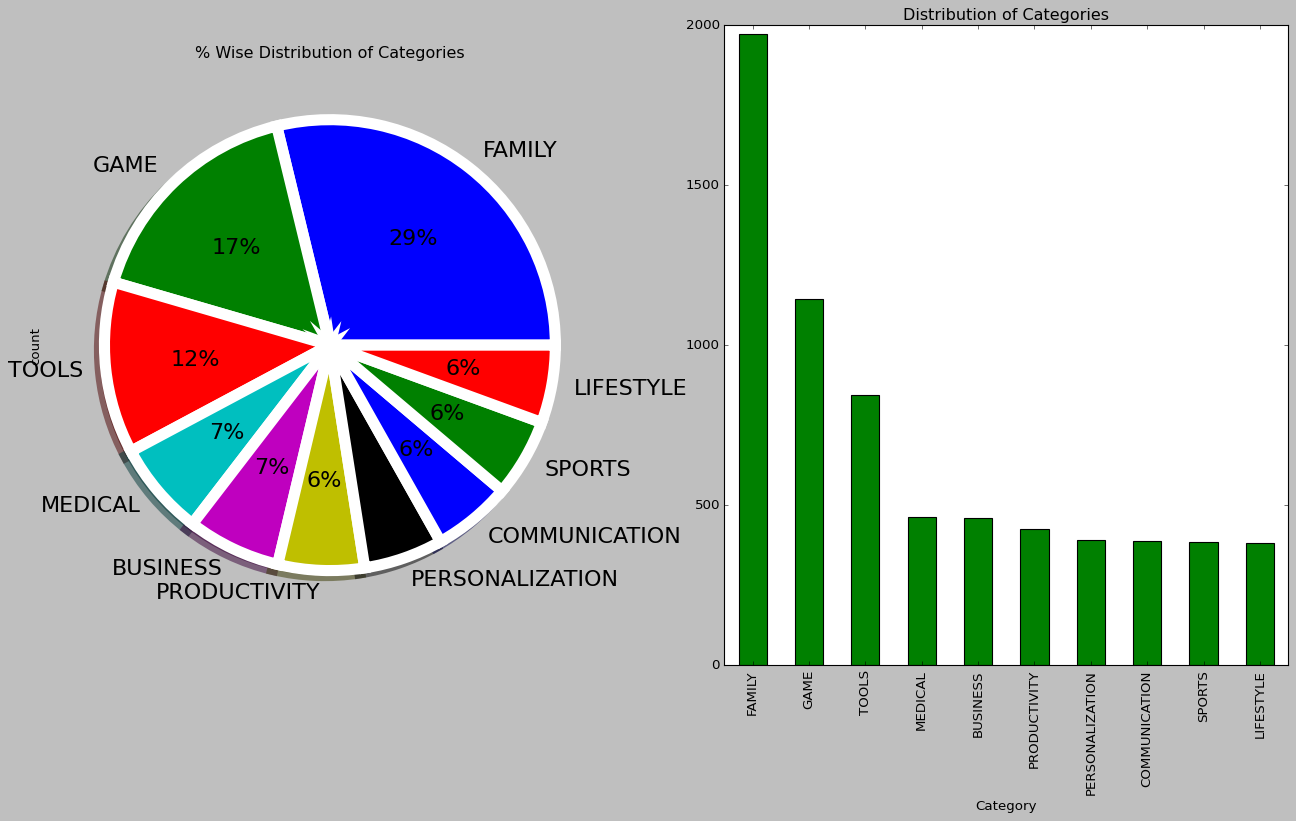

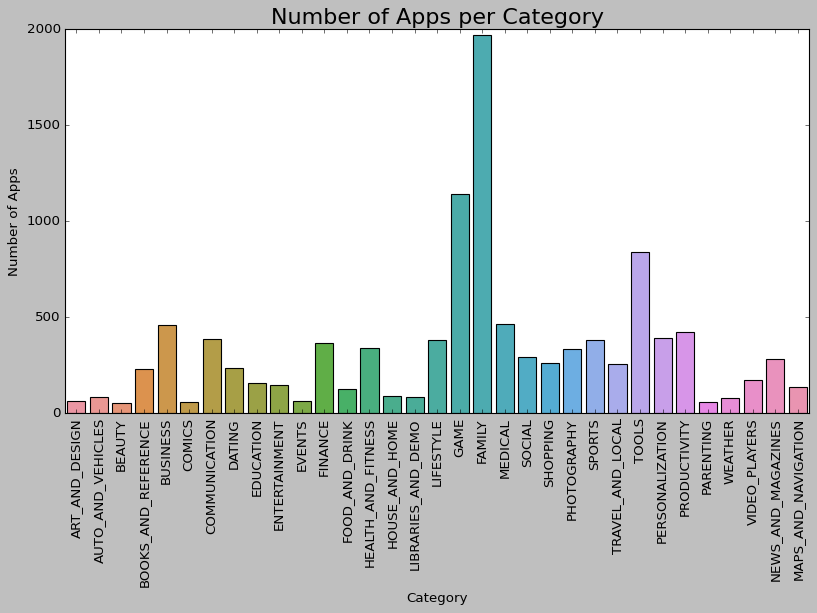

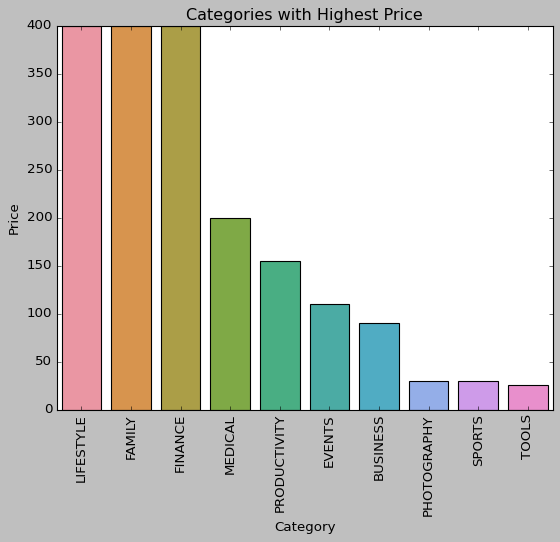

In [52]:
print_histograms(dataset)

In [53]:
def compute_correlations_matrix(dataset):
    plt.figure(figsize=(10, 10))
    sns.heatmap(dataset.corr(), annot=True, cmap='viridis', linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

In [54]:
compute_correlations_matrix(dataset)

ValueError: could not convert string to float: 'Photo Editor & Candy Camera & Grid & ScrapBook'

<Figure size 800x800 with 0 Axes>

In [ ]:
def print_scatter_matrix(dataset):
    pd.plotting.scatter_matrix(dataset, alpha=0.9, figsize=(10, 10))
    plt.show()

In [55]:
print_scatter_matrix()

TypeError: print_scatter_matrix() missing 1 required positional argument: 'dataset'

In [37]:
!gandalf

zsh:1: command not found: gandalf
